In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#import some dataset fromsklearn
#iris=datasets.load_iris(as_frame=true.frame)



In [3]:
iris = pd.read_csv("iris.csv")
print(iris)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


###### observations

- there are 150 rows and 5 cols
-  there are no null values
- there is one duplicated row(101 and 142 are duplicated)
- all the x-cols are continuous
- the x-cols are sepal.length,speal.width,petal.length and petal.width
- there are three flower categories(classes)
- the yy-cols is"variety" (object) which is to be converted to categorical (to be pred)


### Transform the y-col to categorical using labelencoder()

<Axes: >

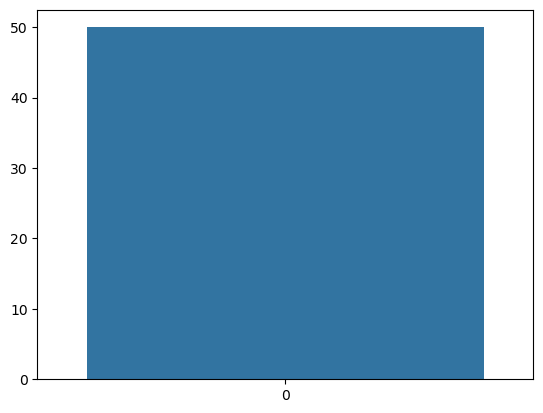

In [4]:
#barplot for categorical col "variety"
import seaborn as sns
counts=iris["variety"].value_counts()
sns.barplot(data=counts)


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris[iris.duplicated(keep=False)]


,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


# Perform label encoding of target column

In [7]:

#encode thr tree flower classes as 0,1,2
labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:, -1])
iris.head()


C:\Users\hanee\AppData\Local\Temp\ipykernel_18936\1389192441.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:, -1])


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#check the data types after label encoding

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


###### Observations

- The target column('variety') is still objecct type.it needs to be converted to numeric(int)

In [9]:
#convert the target column datatype to integer
iris['variety']=pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [10]:
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
#Divide the dataset in to x-cols and y-cols
X=iris.iloc[:,0:4]
Y=iris['variety']

In [12]:
#Further splitting of data info training and testing data sets
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3,random_state=1)
x_train

,sepal.length,sepal.width,petal.length,petal.width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


### Building Decision Tree Classifier using Entropy Criteria


In [13]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy')

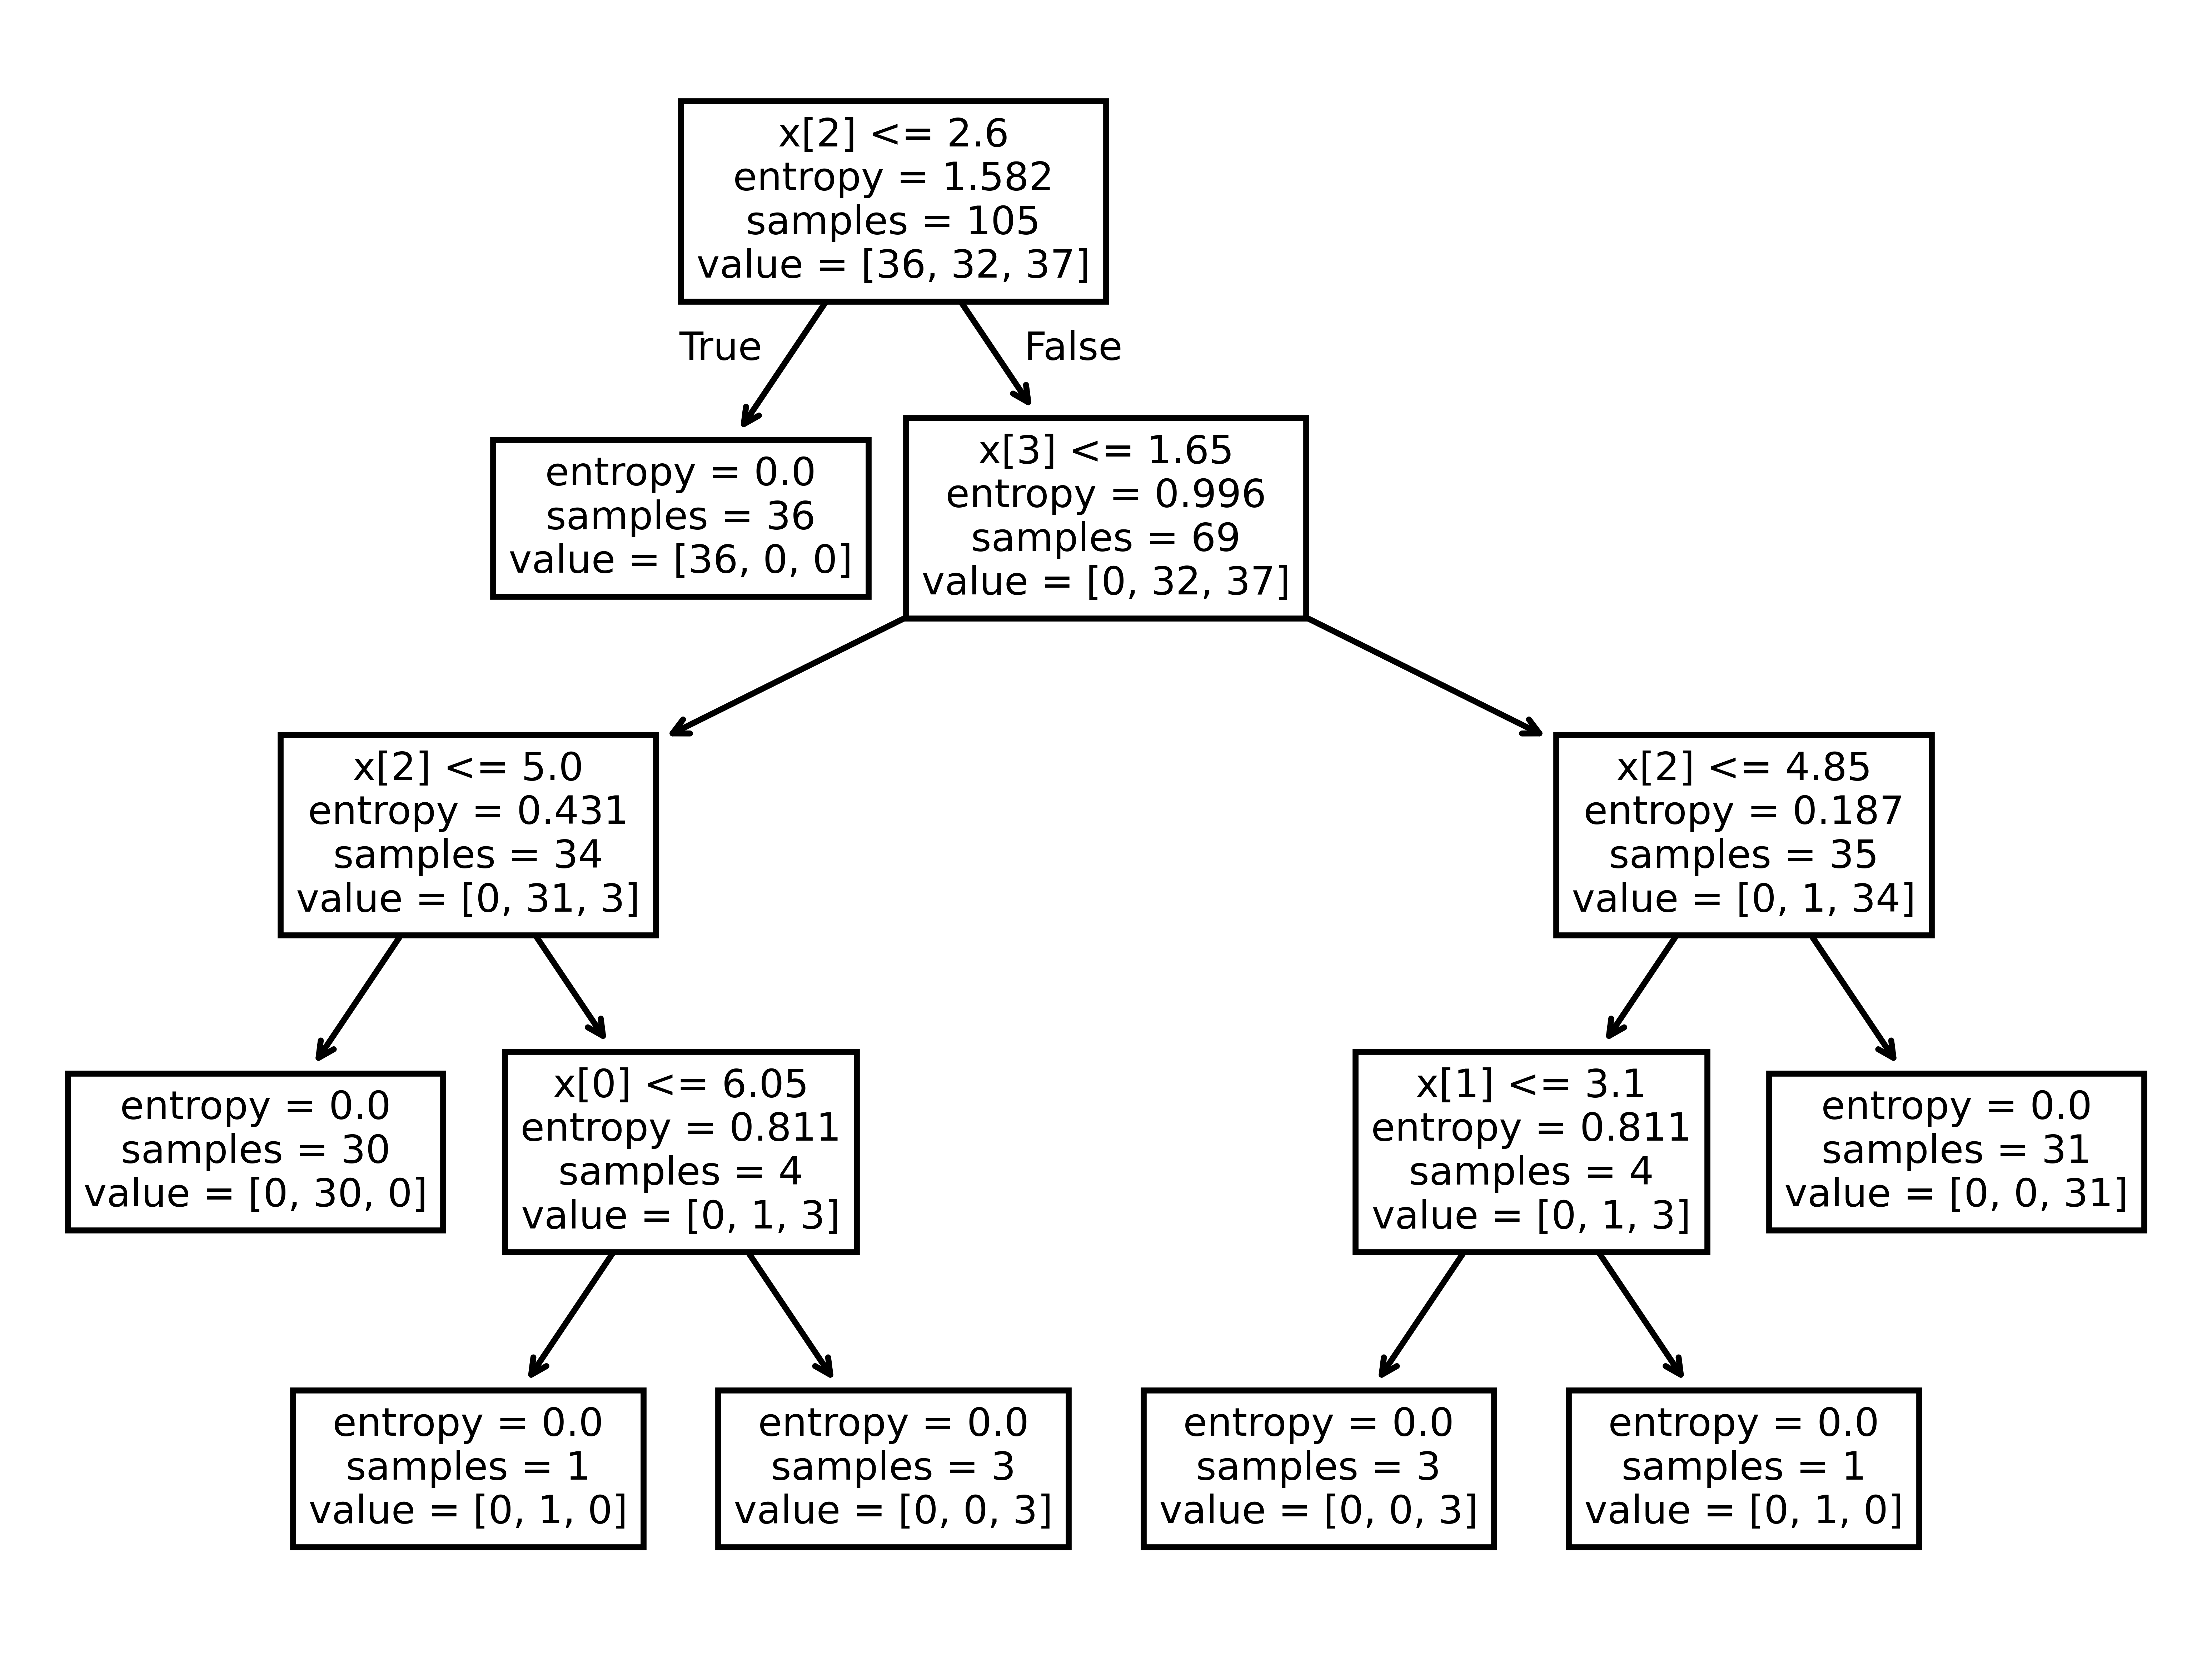

In [14]:
#plot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model);


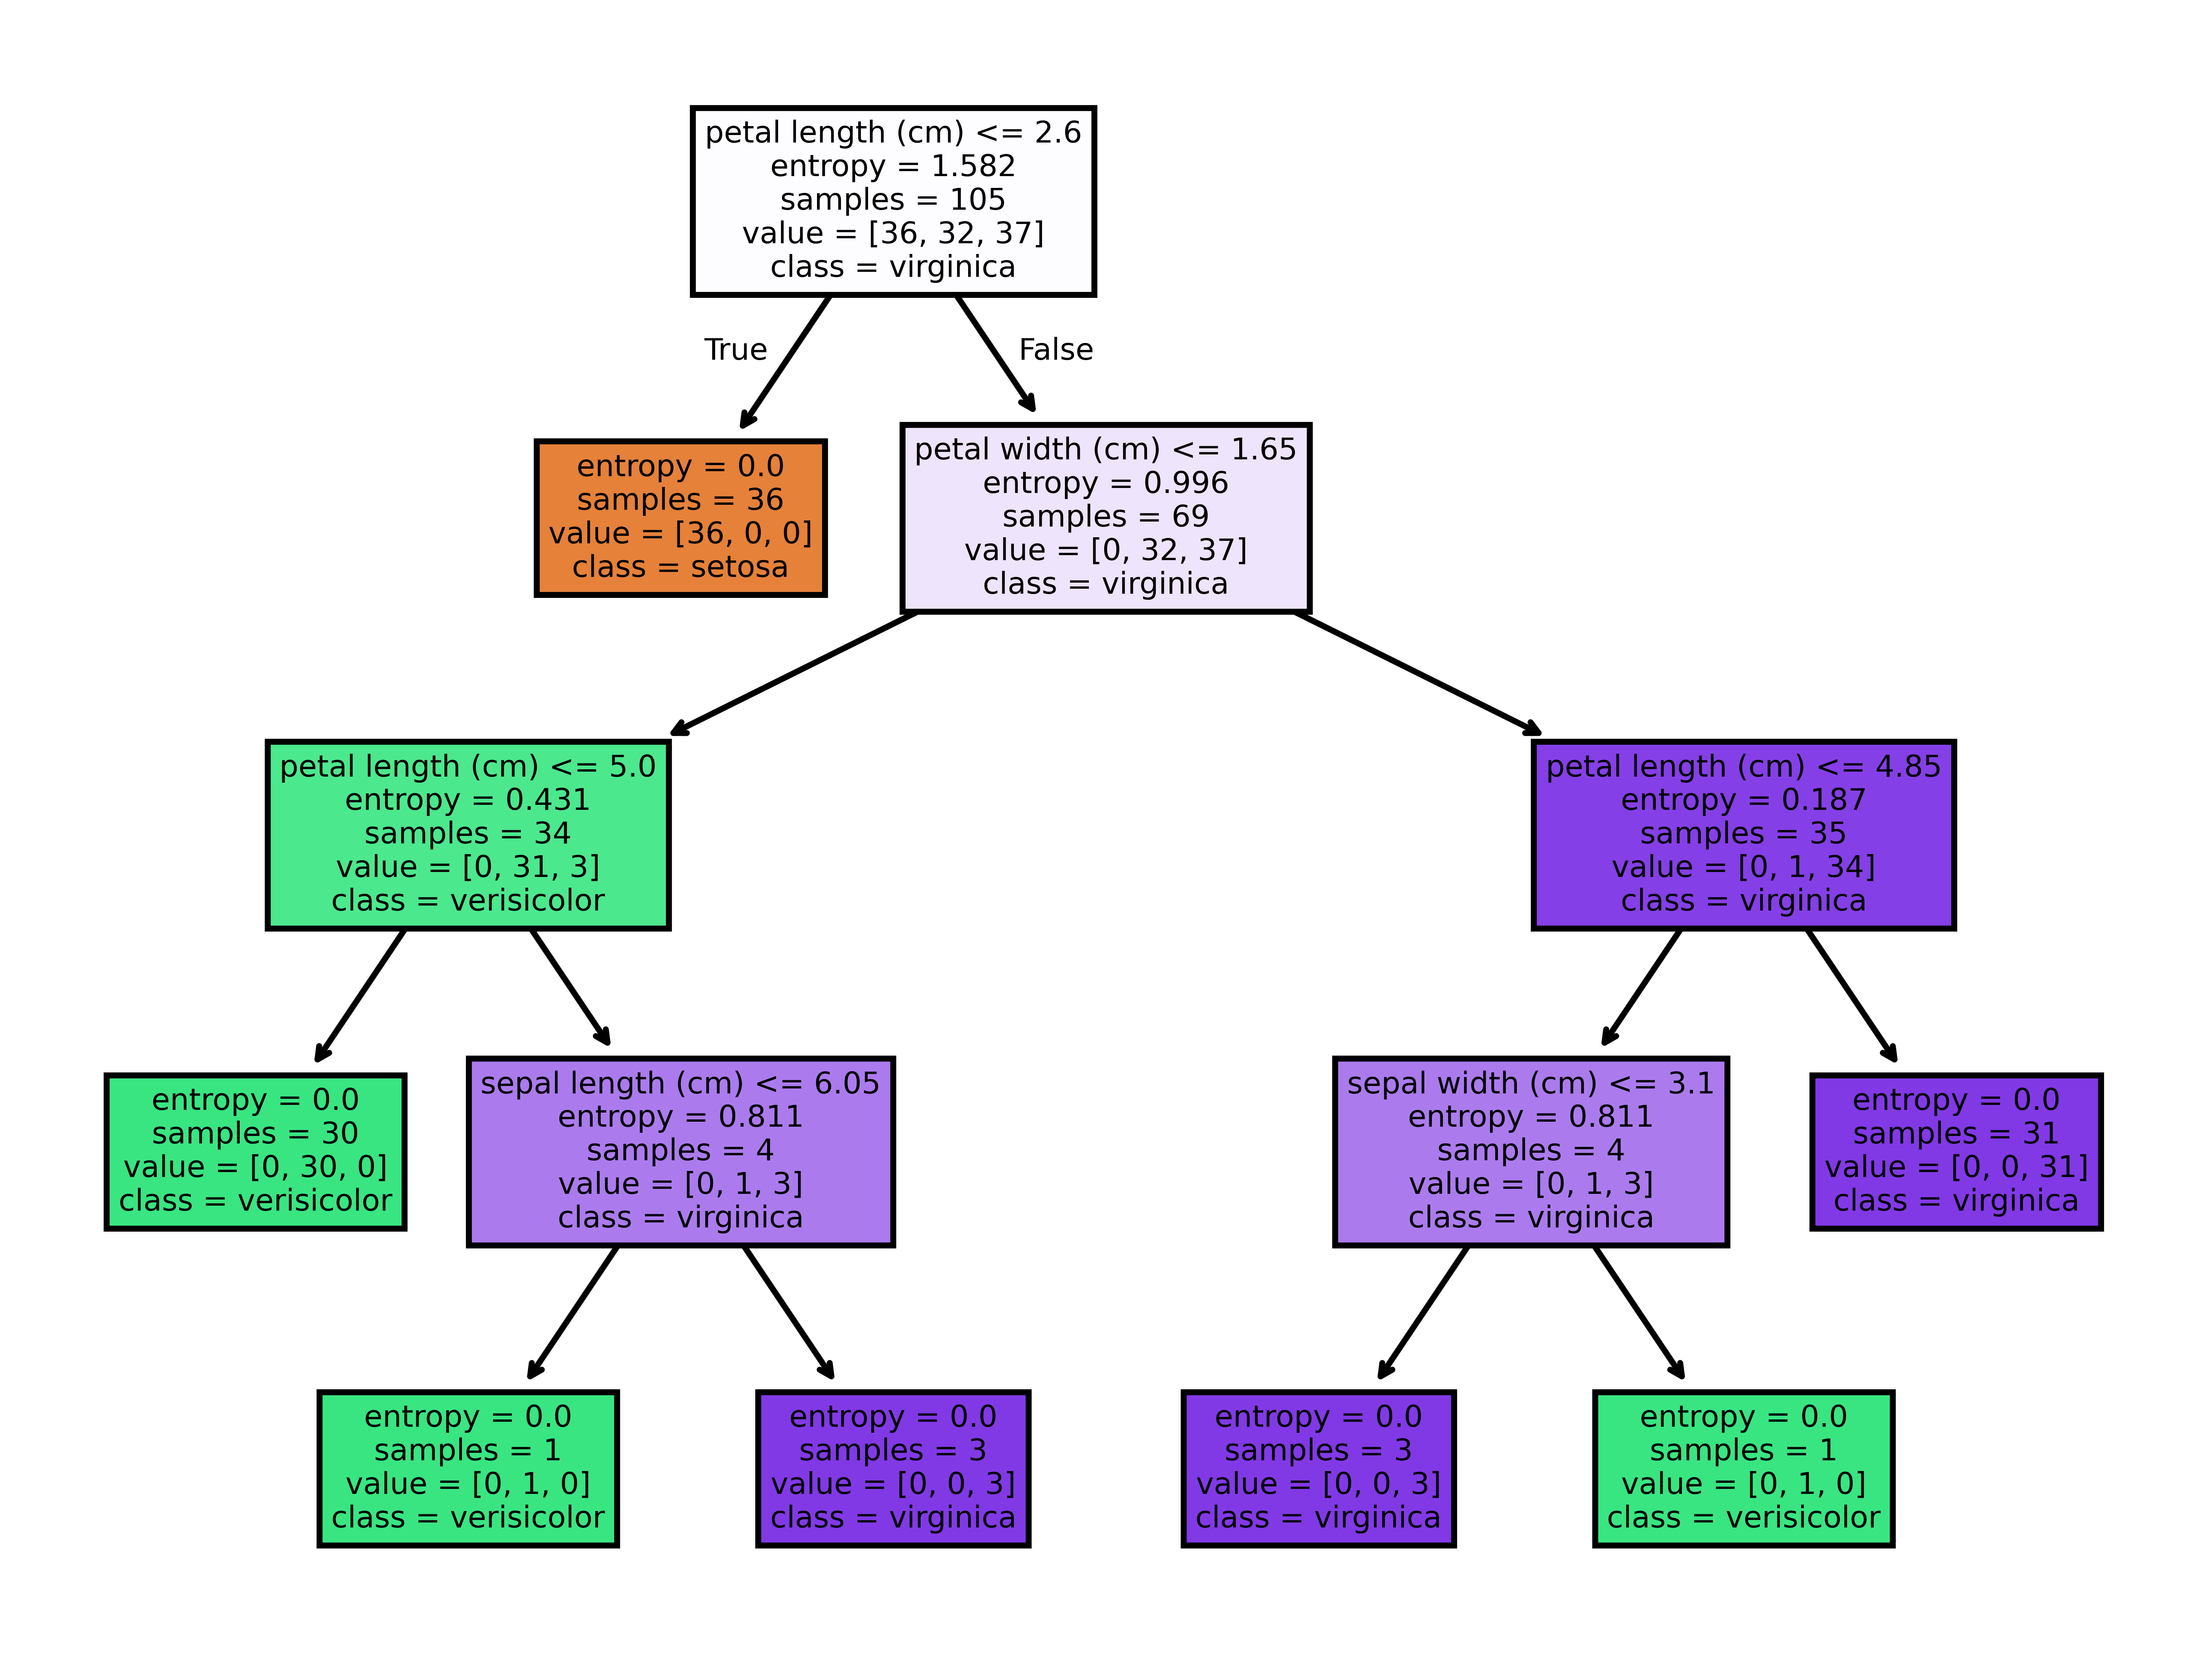

In [15]:
fn=['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']
cn= ['setosa' , 'verisicolor', 'virginica']
plt.figure(dpi=1200)
tree.plot_tree(model,feature_names = fn, class_names=cn, filled = True);


###### Observations

- root node is full trained  data depth 0, 1,2,3,4
- leaf node
- internal node
- leaf
- leaf    - leaf
- the col having least confusion will have maximum information gain

In [16]:
#predicting oon test data
preds = model.predict(x_test) #predicting on test data set
preds


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1], dtype=int64)

In [17]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



###### predictd values
- [percision]0-class = true(0)/true(0) + false(0)
- [recall]0-class    = true(0) / true(0) + false(0) 
- f1 score = 2(p*R)/p+r
